In [1]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"eYrTB0mZJUdt3xLP1sNLIr02vKWw7ZRLSQblPBOqrq8_"
}
client = APIClient(wml_credentials)

DEPRECATED!! Python 3.6 framework is deprecated and will be removed on Jan 20th, 2021. It will be read-only mode starting Nov 20th, 2020. i.e you won't be able to create new assets using this client. Use Python 3.7 instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [2]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [3]:
space_uid=guid_from_space_name(client,'digi_naturalist_deploy')
print("Space UID="+space_uid)

Space UID=60295b97-1414-4e2e-8f18-dbb9c405edeb


In [4]:
client.set.default_space(space_uid)

'SUCCESS'

In [5]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [6]:
client.repository.download('6857db8b-0f44-4ea0-8249-6817bb2d8430','model.tar.gz')

Successfully saved model content to file: 'model.tar.gz'


'C:\\Users\\HP\\Desktop\\dgi naturalist\\Flask\\IBM Files/model.tar.gz'

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model(r"C:\Users\HP\Desktop\dgi naturalist\Flask\IBM Files\model\natur1.h5")

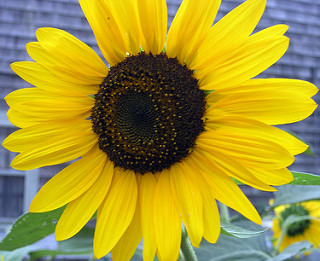

In [8]:
from IPython.display import Image
img=Image(filename=r"C:\Users\HP\Desktop\dgi naturalist\datasets\New\traindata\sunflower\sunf.jpg")
img

In [9]:
from tensorflow.keras.preprocessing  import image
path2=r"C:\Users\HP\Desktop\dgi naturalist\datasets\New\traindata\sunflower\sunf.jpg"

img = image.load_img(path2,target_size = (64,64))

In [10]:
x = image.img_to_array(img)

In [11]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 3)

In [12]:
pred = np.argmax(model.predict(x))
pred

7